In [1]:
import shallow_water as sw
import wave_simulation as wav
import parmap
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib as mpl

N_t =35000, last simulation time: 250.56965585528621
When arrive maximum speed 250.56965585528621s


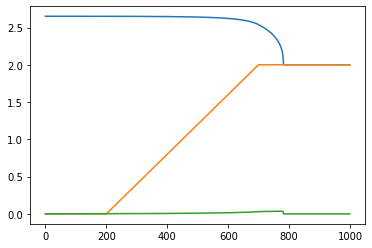

In [2]:
N_t = 35000
# t_search = np.arange(1,100+0.1,0.5)
max_ux,max_x,max_t,last_t = wav.sim_max_u_x(10000,N_t,1)
print(f'N_t ={N_t}, last simulation time:',last_t)
print(f'When arrive maximum speed {last_t}s')

In [12]:
max_x
# plt.plot()


0.2002002002002002

In [2]:
N_t = 150000

t_search = np.arange(1,100+0.1,0.5)
h_list, u_list, t_list, h_check, u_check = sw.Shallow_water_check(1.0034,N_t,1)
print(f'N_t ={N_t}, last simulation time:',t_list[-1])

N_t =150000, last simulation time: 4960.823397267263


131.43026735169374

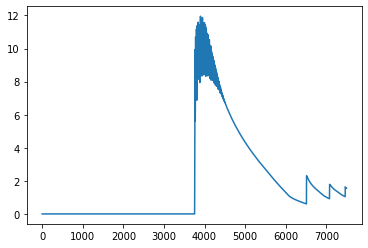

In [6]:
plt.plot(np.array(h_list)[:,-1])
t_list[np.where(np.array(h_list)[:,-1]>0)[0][0]]

In [9]:
131.3968815628058/60

2.189948026046763

In [3]:
cSt_list = np.logspace(0,4,160)
# cSt_list = np.linspace(1,10000,40)
# N_t = 36000
max_u_ensemble= []
last_t_list =  []
t_search = np.arange(1,150+0.1,0.5)
for i in range(1):
    max_u = []
    max_u_t = []
    t_lists = []
    h_lists = []
    u_lists = []
    for S in parmap.map(sw.Shallow_water_check,cSt_list,N_t,t_search,Draw=False,pm_pbar=True, pm_processes=10):
        h_list, u_list, t_list, h_check, u_check = S       
        last_t = t_list[np.where(np.array(h_list)[:,-1]>0)[0][0]]
        last_t_list.append(last_t)
        max_u_t.append(np.max(u_list))
        max_u.append(np.max(u_check,axis=1))
        t_lists.append(t_list)
        h_lists.append(h_list)
        u_lists.append(u_list)
        # max_u5.append(np.max(u_check5))
    max_u_ensemble.append(max_u)

100%|██████████| 160/160 [16:53<00:00,  6.34s/it]


In [9]:
en_max_u = np.mean(max_u_ensemble,axis=0)

In [10]:
np.array(max_u).shape

(40, 199)

Text(0, 0.5, 'Maximum velocity [m/s]')

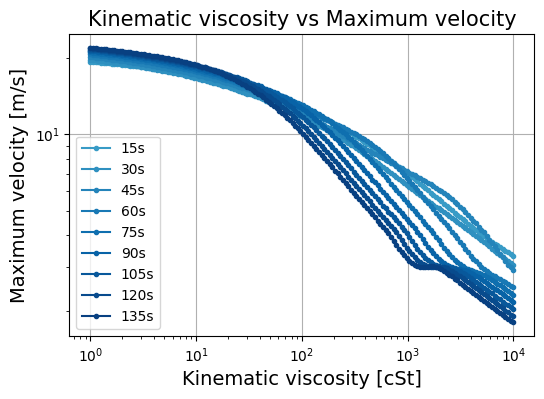

In [204]:
# plt.plot(cSt_list, max_u10)
# plt.plot(cSt_list, max_u5)
plt.figure(dpi=100) 
label = [f'{i}s' for i in np.array(t_search[28:280:30],dtype=int)]
label_ = [i for i in np.array(t_search[28:280:30],dtype=int)]

# time_stamp = [20,40,60,80,100,200,8000]
int_ =np.linspace(0.7,1,len(label))
color = plt.cm.GnBu(int_)

# plt.plot(cSt_list, (np.array(en_max_u).T[18:100:30]).T,label = np.array(t_search[18:100:30],dtype=int)
for i in range(len(label)):
    plt.plot(cSt_list, (np.array(max_u).T[28:280:30]).T[:,i],label = label[i],marker='o',markersize=3,color=color[i])
# plt.set_cmap('YlOrRd')
# plt.plot(cSt_list, np.array(max_u).T[20]*3600/1000,'-o',markersize=5, label =t_search[20])
# plt.plot(cSt_list, np.array(max_u).T[40]*3600/1000,'-o',markersize=5, label =t_search[40])
# plt.plot(cSt_list, np.array(max_u_t),'-o',markersize=5) #label =t_search[40])
plt.legend()
plt.grid()

plt.xscale('log')
plt.yscale('log')

plt.title('Kinematic viscosity vs Maximum velocity',fontsize= 15)

plt.xlabel('Kinematic viscosity [cSt]',fontsize=14)
plt.ylabel('Maximum velocity [m/s]',fontsize=14)

# plt.savefig('ppt용/cSt vs Maximum verocity.png',dpi=400)

Text(0, 0.5, 'Maximum velocity [m/s]')

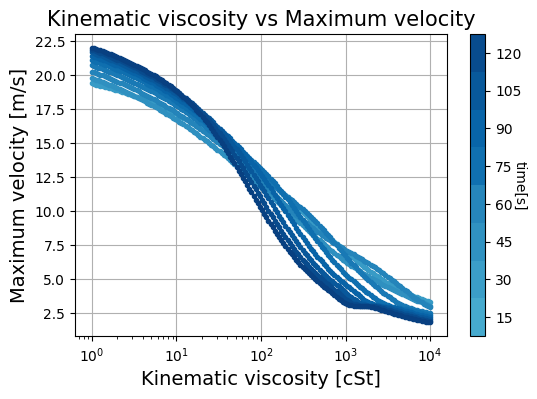

In [201]:
# plt.plot(cSt_list, max_u10)
# plt.plot(cSt_list, max_u5)
plt.figure(dpi=100) 
label = [f'{i}s' for i in np.array(t_search[28:280:30],dtype=int)]
label_ = [i for i in np.array(t_search[28:280:30],dtype=int)]

# time_stamp = [20,40,60,80,100,200,8000]
int_ =np.linspace(0.7,1,len(label))
color = plt.cm.GnBu(int_)

# plt.plot(cSt_list, (np.array(en_max_u).T[18:100:30]).T,label = np.array(t_search[18:100:30],dtype=int)
for i in range(len(label)):
    plt.plot(cSt_list, (np.array(max_u).T[28:280:30]).T[:,i],label = label[i],marker='o',markersize=3,color=color[i])
# plt.set_cmap('YlOrRd')
# plt.plot(cSt_list, np.array(max_u).T[20]*3600/1000,'-o',markersize=5, label =t_search[20])
# plt.plot(cSt_list, np.array(max_u).T[40]*3600/1000,'-o',markersize=5, label =t_search[40])
# plt.plot(cSt_list, np.array(max_u_t),'-o',markersize=5) #label =t_search[40])
# plt.legend()

sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('GnBu',len(label)*3), norm=plt.Normalize(vmin=min(label_)-210, vmax=max(label_)))
sm.set_array([])
cbar =plt.colorbar(sm, ticks=label_,
                   boundaries=np.arange(min(label_)-7.5,max(label_)+7.5,15))
plt.grid()

cbar.set_label('time[s]', rotation=270)
plt.xscale('log')
# plt.yscale('log')

plt.title('Kinematic viscosity vs Maximum velocity',fontsize= 15)

plt.xlabel('Kinematic viscosity [cSt]',fontsize=14)
plt.ylabel('Maximum velocity [m/s]',fontsize=14)

# plt.savefig('ppt용/cSt vs Maximum verocity.png',dpi=400)

In [104]:
def fit_root(x,a,b):
    return a*(x**0.5) + b

In [105]:
popt,_ = curve_fit(fit_root,cSt_list,last_t_list,bounds = (0,[np.inf,np.inf]))

In [107]:
def plot(x,a):
    return a**x

In [238]:
def plot_x(x,a):
    return (x**(1/a))

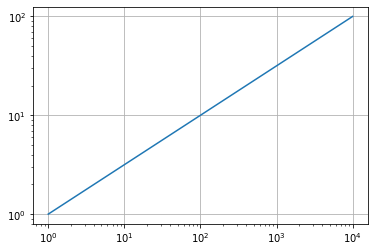

In [123]:
plt.plot(x,plot_x(x,2))
plt.xscale('log')
plt.yscale('log')
plt.grid()

In [231]:
def logg(x,b):
    return np.log(x)

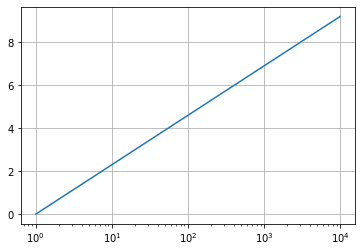

In [233]:
temp = np.logspace(0,4,1000)

plt.plot(temp,logg(temp,100000))
# plt.yscale('log')
plt.xscale('log')
plt.grid()

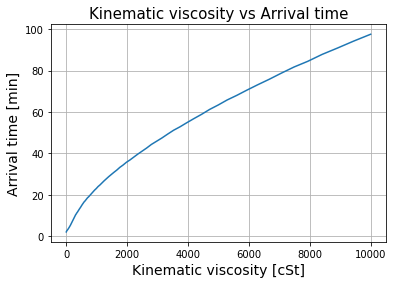

In [215]:
plt.plot(cSt_list,np.array(last_t_list)/60)#,marker='o',markersize=3)
# plt.plot(cSt_list,fit_root(cSt_list,*popt)/60)
cSt_list[1]
# plt.plot(np.linspace(1,1000,100000),alpha(np.linspace(1,1000,100000),0,4)*np.array(last_t_list)[0])
plt.ylabel('Arrival time [min]',fontsize= 14)
plt.xlabel('Kinematic viscosity [cSt]',fontsize= 14)
# plt.xscale('log')
# plt.yscale('log')
plt.title('Kinematic viscosity vs Arrival time',fontsize= 15)
plt.grid()
plt.savefig('ppt용/cSt vs Arrival tie.png',dpi=400)


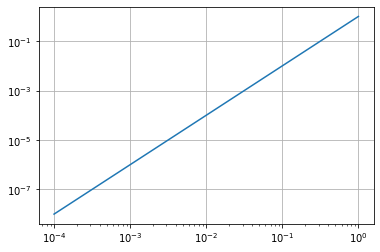

In [243]:
plt.plot(1/temp,plot_x(1/temp,0.5))
plt.yscale('log')
plt.xscale('log')
plt.grid()

In [237]:
plt.plot(x,fit_root(x,*popt)/3600)
plt.xscale('log')
plt.yscale('log')
plt.grid()

NameError: name 'x' is not defined

# wave simulation

In [1]:
import shallow_water as sw
import wave_simulation as wav
import parmap
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N_t =35000, last simulation time: 357.64160964295723
When arrive maximum speed 11.075820948941844s
When arrive maximum speed position 55.95595595595596m
maximum speed is 1.8535534554690998m/s


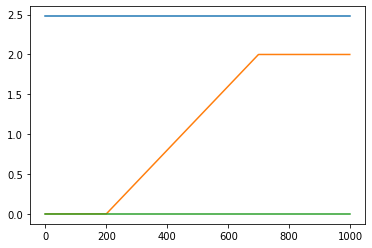

In [7]:
N_x = 1000
err = 1e-4
L_x = 1e+2
dx = L_x/(N_x - 1)
x = np.linspace(0,L_x,N_x)
t_200 = np.arange(0,200,0.1)
N_t = 35000
# t_search = np.arange(1,100+0.1,0.5)
max_ux,max_x,max_t,last_t, t_list, u_list,h_list = wav.sim_max_u_x(214,N_t,1)
print(f'N_t ={N_t}, last simulation time:',last_t)
print(f'When arrive maximum speed {max_t}s')
print(f'When arrive maximum speed position {max_x}m')
print(f'maximum speed is {max(max_ux)}m/s')


In [9]:
t_idx = np.searchsorted(np.array(t_list),t_200)
h_200 = np.array(h_list)[t_idx]
u_200 = np.array(u_list)[t_idx]

print(len(u_200))

2000


In [68]:
cSt_list = np.logspace(0,4,800)
# cSt_list = np.linspace(1,10000,40)
# N_t = 36000
max_u_ensemble= []
last_t_list =  []


max_xs = []
max_ts = []
max_uxs =[]
max_speed = []
t_lists = []
h_lists_200 = []
u_lists_200= []
for S in parmap.map(wav.sim_max_u_x,cSt_list,N_t,Draw=False,pm_pbar=True, pm_processes=15):
    max_ux,max_x,max_t,last_t,t_list, u_list,h_list = S       
    max_uxs.append(max_ux)
    max_xs.append(max_x)
    max_ts.append(max_t)
    t_idx = np.searchsorted(np.array(t_list),t_200)
    h_200 = np.array(h_list)[t_idx]
    u_200 = np.array(u_list)[t_idx]
    h_lists_200.append(h_200)
    u_lists_200.append(u_200)
    # max_u5.append(np.max(u_check5))

812it [17:09,  1.27s/it]                          


In [69]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [70]:
cSt_list[find_nearest_idx(np.array(max_xs),30)]

212.769751991414

In [71]:
np.max(np.array(max_uxs),axis=1).shape

(800,)

In [86]:
plt.text()

452

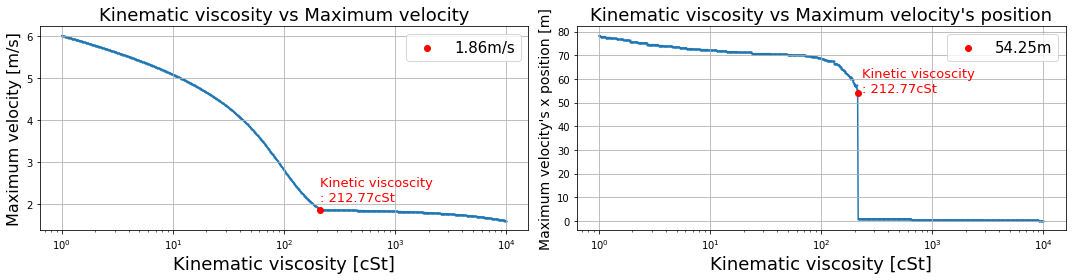

In [138]:
plt.figure(figsize=(15,4))
plt.subplot(121)

plt.plot(cSt_list,np.max(np.array(max_uxs),axis=1),marker='o',markersize=1,zorder=1)
plt.scatter(cSt_list[465],np.max(np.array(max_uxs),axis=1)[465],label=f'{np.max(np.array(max_uxs),axis=1)[465]:.02f}m/s',zorder=2,color='red')
plt.text(cSt_list[465],np.max(np.array(max_uxs),axis=1)[465]+0.2,f'Kinetic viscoscity \n: {cSt_list[465]:.02f}cSt',fontsize=13,color='red')
plt.legend(fontsize=15)
# plt.plot(cSt_list,max_xs)
plt.grid()
plt.xscale('log')
plt.title('Kinematic viscosity vs Maximum velocity',fontsize= 18)

plt.xlabel('Kinematic viscosity [cSt]',fontsize=18)
plt.ylabel('Maximum velocity [m/s]',fontsize=16)
plt.subplot(122)
plt.plot(cSt_list,max_xs,marker='o',markersize=1,zorder=1)
plt.scatter(cSt_list[465],max_xs[465],color='red',zorder=2,label=f'{max_xs[465]:.02f}m')
plt.text(cSt_list[465]+20,max_xs[465]+0.2,f'Kinetic viscoscity \n: {cSt_list[465]:.02f}cSt',fontsize=13,color='red')

plt.legend(fontsize=15)

plt.grid()
plt.title('Kinematic viscosity vs Maximum velocity\'s position',fontsize= 18)
plt.ylabel('Maximum velocity\'s x position [m]',fontsize=14)
plt.xlabel('Kinematic viscosity [cSt]',fontsize=18)
plt.xscale('log')
plt.tight_layout()
plt.savefig('보고서용/cSt vs Maximum velocity and position.png',dpi=800)
# plt.plot(cSt_list,np.max(np.array(max_uxs),axis=1),marker='o',markersize=1)
# plt.yscale('log')

In [94]:
slope = lambda x,b,L: (x>=b)*(x-b)*(L/(L_x-b))
dam  = lambda x,a,b,L: ((x>=a)&(x<=b))*L

u = np.zeros(N_x)
z = np.ones(N_x)*1
s = slope(x,0,1.5)
d = dam(x,20,28,1.6)
z = z 

In [30]:
u_array_200 = np.array(u_lists_200)
h_array_200 = np.array(h_lists_200)

In [21]:
t_200.shape

(2000,)

In [20]:
u_array_200.shape

(400, 2000, 1000)

In [27]:
x[700]

70.07007007007007

In [190]:
cSt_list[465]

212.769751991414

In [56]:
plt.plot(x,np.array([z for i in range(20)]).T+ h_array_200[::20,100,:])

ValueError: operands could not be broadcast together with shapes (1000,20) (20,1000) 

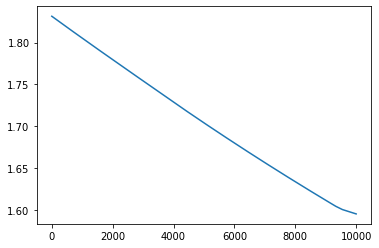

In [67]:
plt.plot(cSt_list, np.max(u_array_200[:,1,:],axis=1))
# plt.xscale('log')

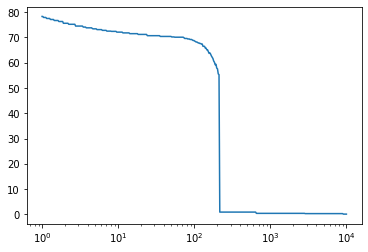

In [11]:
plt.plot(cSt_list,max_xs)
# plt.vlines(180,0,10)
# plt.plot(cSt_list,max_ts)

plt.xscale('log')

In [22]:
len(max_uxs[::10])

40

In [38]:
len(x[2:-2])

996

In [142]:
cSt_list[448]

174.9055153270193

In [145]:
def max_list(num):
    idx = np.argmax(max_uxs[num])
    return x[2:-2][idx],np.max(max_uxs[num])

In [205]:
target =212.77
ta_list = np.arange(-40,40+4,20)
target_list = [target+i for i in ta_list]
target_cSt = np.searchsorted(cSt_list, target_list)-1
target_cSt


array([446, 456, 465, 472, 479], dtype=int64)

In [226]:
np.arange(-40,40+4,20) + target

array([172.77, 192.77, 212.77, 232.77, 252.77])

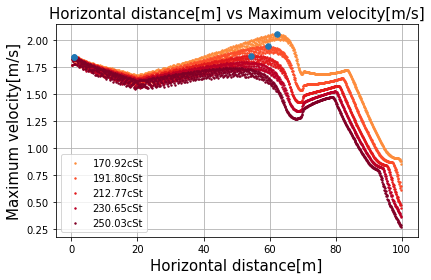

In [228]:
plt.grid(zorder=2)
len_list =len(target_cSt)
int_ = np.linspace(0.5,1,len_list)
color = plt.cm.YlOrRd(int_)

for j,i in enumerate(target_cSt):
    plt.scatter(x[2:-2],max_uxs[i],label=f'{cSt_list[i]:.02f}cSt',s=2,zorder=3,color=color[j])
    plt.scatter(*max_list(i),marker='o',s=30,color='tab:blue',zorder=4)
plt.legend()
plt.xlabel('Horizontal distance[m]',fontsize=15)
plt.ylabel('Maximum velocity[m/s]',fontsize=15)
plt.title('Horizontal distance[m] vs Maximum velocity[m/s]',fontsize=15)
plt.tight_layout()
plt.savefig('보고서용/cSt wave pool.png',dpi=400)
# plt.yscale('log')
# plt.scatter(*max_list(464),marker='x',s=100)
# # plt.text(x[2:-2],max_uxs[468])

# plt.plot(x[2:-2],max_uxs[484])
# plt.scatter(*max_list(484),marker='x',s=100)

# plt.plot(x[2:-2],max_uxs[444])
# plt.scatter(*max_list(444),marker='x',s=100)

# # plt.plot(x[2:-2],max_uxs[468])

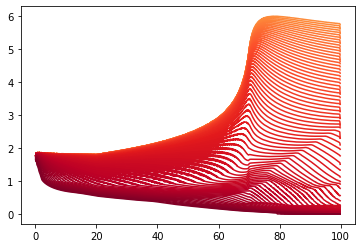

In [185]:
len_list =len(max_uxs[::10])
max_uxs_list =max_uxs[::10]
int_ = np.linspace(0.5,1,len_list)
color = plt.cm.YlOrRd(int_)
for i,mx_uxs in enumerate(max_uxs_list):
    plt.plot(x[2:-2],mx_uxs,color=color[i])



In [35]:
plt.plot(x[2:-2],max_uxs_list[10],color=color[i])

IndexError: index 39 is out of bounds for axis 0 with size 1

In [ ]:
u_list = np.array(u_list)
h_list = np.array(h_list)
t_list = np.array(t_list)